In [41]:
import pandas as pd
import numpy as np
import math

from scipy.stats import chisquare
from scipy.stats import kstest
from scipy.stats import cramervonmises
from scipy.stats import anderson

from matplotlib import pyplot as plt
from scipy.stats import laplace
from scipy.stats import norm
from scipy.stats import uniform
from scipy.stats import t
from numpy.random import standard_t as student

### 2. Смоделировать выборки из 𝒩 (𝜇, 𝜎2) и проверить их на нормальность с помощью 
### в) критерия Андерсона-Дарлинга с оцененными параметрами 
### г) критерия Андерсона-Дарлинга для проверки нормальности 
### Моделировать 1000 выборок и построить распределение фактического уровня значимости.

In [42]:
# Предварительно сделаем словарь для того,
# чтобы хранить там уровень по его квантили
level_and_quan = {}

with open("ADQuantiles.txt") as file:
    first_line = file.readline()
    for line in file:
        temp = line.strip().split()
        level_and_quan[float(temp[1])] = float(temp[0]) 
        
keys = level_and_quan.keys()

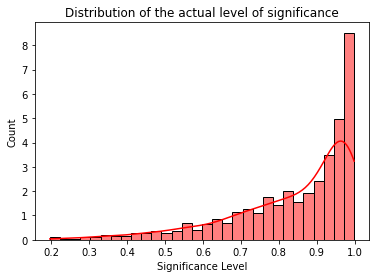

In [43]:
# г)

import numpy as np
from seaborn import histplot
from scipy.stats import norm, anderson

mu = 0
variance = 1
p_values = []

for i in range(1000):
    data = np.random.normal(mu, variance, 1000)
    ad_stat, critical_values, signif_level = anderson(data)
    closest_stat = min(keys, key=lambda x : abs(x - ad_stat))
    p_value = 1 - level_and_quan[closest_stat]
    p_values.append(p_value)
        
# График распределения фактического уровня значимости
histplot(data=p_values, stat='density', color='red', kde=True, bins=30)
plt.title('Distribution of the actual level of significance')
plt.xlabel('Significance Level')
plt.ylabel('Count')
plt.show()

In [ ]:
# в)  Пока что неправильно

p_values = []
count_of_H0 = 0
count_of_H1 = 0

for k in range(1000):
    rng = np.random.default_rng()
    data = rng.random(size=100)
    ad_stat, critical_values, signif_level = anderson(data, dist='norm')
    #print(f"Статистика: {ad_stat}\n")

    for i in range(len(critical_values)):
        #print(f"Итерация {i + 1}")

        if ad_stat >  critical_values[i]:
            count_of_H1 += 1
            #print(f"Критическое значение: {critical_values[i]}")
            #print(f"Для уровня значимости {signif_level[i]} нулевая гипотеза может быть отклонена")
        else:
            count_of_H0 += 1
            #print(f"Критическое значение: {critical_values[i]}")
            #print(f"Для уровня значимости {signif_level[i]} нулевая гипотеза НЕ может быть отклонена")

        #print()
    
    closest_stat = min(keys, key=lambda x : abs(x - ad_stat))
    p_value = 1 - level_and_quan[closest_stat]
    p_values.append(p_value)
    
print(f"Нулевая гипотеза может быть отклонена {count_of_H1} раз")
print(f"Нулевая гипотеза НЕ может быть отклонена {count_of_H0} раз")
        
# График распределения фактического уровня значимости
histplot(data=p_values, stat='density', color='red', kde=True, bins=30)
plt.title('Distribution of the actual level of significance')
plt.xlabel('Significance Level')
plt.ylabel('Count')
plt.show()

### 3. Проверить нормальность выборки размеров 20, 50, 100 из 
#### а) 𝒩(0,1)
#### б) exp(1)
#### в) Лапласа с параметром 1
#### г) хи-квадрат 1
#### д) стьюдентовские с 4 степенями свободы
#### е) фишеровские 3,4
#### с помощью критериев Харке-Бера, Шапиро, Д’Агостино.

In [45]:
# критерий Шапиро

import numpy as np
from scipy.stats import norm, expon, laplace, chi2, t, f

from scipy.stats import shapiro

print("Критерий Шапиро")

alpha = 0.05
sizes = [20, 50, 100]

for size in sizes:
    n_20 = np.random.normal(0, 1, size)
    e_20 = np.random.exponential(1, size)
    l_20 = np.random.laplace(1, 1, size)
    c_20 = np.random.chisquare(1, size)
    t_20 = np.random.standard_t(4, size)
    f_20 = np.random.f(3, 4, size)

    res_norm = shapiro(n_20)
    res_exp = shapiro(e_20)
    res_lap = shapiro(l_20)
    res_chi = shapiro(c_20)
    res_stud = shapiro(t_20)
    res_fish = shapiro(f_20)

    if res_norm[1] > alpha:
        print(f"Данные нормального распределения({size}) распределены нормально")
        print(f"pvalue = {res_norm[1]} > {alpha}")
    else:
        print(f"Данные нормального распределения({size}) НЕ соответсвуют нормальному распределению")
        print(f"pvalue = {res_norm[1]} < {alpha}")

    if res_exp[1] > alpha:
        print(f"Данные экспоненциального распределения({size}) распределены нормально")
        print(f"pvalue = {res_exp[1]} > {alpha}")
    else:
        print(f"Данные экспоненциального распределения({size}) НЕ соответсвуют нормальному распределению")
        print(f"pvalue = {res_exp[1]} < {alpha}")

    if res_lap[1] > alpha:
        print(f"Данные распределения Лапласа({size}) распределены нормально")
        print(f"pvalue = {res_lap[1]} > {alpha}")
    else:
        print(f"Данные распределения Лапласа({size}) НЕ соответсвуют нормальному распределению")
        print(f"pvalue = {res_lap[1]} < {alpha}")

    if res_chi[1] > alpha:
        print(f"Данные распределения хи-квадрат({size}) распределены нормально")
        print(f"pvalue = {res_chi[1]} > {alpha}")
    else:
        print(f"Данные распределения хи-квадрат({size}) НЕ соответсвуют нормальному распределению")
        print(f"pvalue = {res_chi[1]} < {alpha}")

    if res_stud[1] > alpha:
        print(f"Данные распределения Стьюдента({size}) распределены нормально")
        print(f"pvalue = {res_stud[1]} > {alpha}")
    else:
        print(f"Данные распределения Стьюдента({size}) НЕ соответсвуют нормальному распределению")
        print(f"pvalue = {res_stud[1]} < {alpha}")

    if res_fish[1] > alpha:
        print(f"Данные распределения Фишера({size}) распределены нормально")
        print(f"pvalue = {res_fish[1]} > {alpha}")
    else:
        print(f"Данные распределения Фишера({size}) НЕ соответсвуют нормальному распределению")
        print(f"pvalue = {res_fish[1]} < {alpha}")

Критерий Шапиро
Данные нормального распределения(20) распределены нормально
pvalue = 0.2825527489185333 > 0.05
Данные экспоненциального распределения(20) НЕ соответсвуют нормальному распределению
pvalue = 5.553488517762162e-05 < 0.05
Данные распределения Лапласа(20) распределены нормально
pvalue = 0.4335058331489563 > 0.05
Данные распределения хи-квадрат(20) распределены нормально
pvalue = 0.05958152562379837 > 0.05
Данные распределения Стьюдента(20) НЕ соответсвуют нормальному распределению
pvalue = 0.01754445768892765 < 0.05
Данные распределения Фишера(20) НЕ соответсвуют нормальному распределению
pvalue = 5.1973485824419186e-05 < 0.05
Данные нормального распределения(50) распределены нормально
pvalue = 0.3453577160835266 > 0.05
Данные экспоненциального распределения(50) НЕ соответсвуют нормальному распределению
pvalue = 2.216897701146081e-05 < 0.05
Данные распределения Лапласа(50) НЕ соответсвуют нормальному распределению
pvalue = 0.0005323012010194361 < 0.05
Данные распределения хи

In [46]:
# критерий Харке-Бера

# Тест Харка-Бера обычно используется для больших наборов данных (n > 2000),
# в которых другие тесты на нормальность (например, тест Шапиро-Уилка) ненадежны.

from scipy.stats import jarque_bera

print("Критерий Харке-Бера")

for size in sizes:
    n_20 = np.random.normal(0, 1, size)
    e_20 = np.random.exponential(1, size)
    l_20 = np.random.laplace(1, 1, size)
    c_20 = np.random.chisquare(1, size)
    t_20 = np.random.standard_t(4, size)
    f_20 = np.random.f(3, 4, size)

    res_norm = jarque_bera(n_20)
    res_exp = jarque_bera(e_20)
    res_lap = jarque_bera(l_20)
    res_chi = jarque_bera(c_20)
    res_stud = jarque_bera(t_20)
    res_fish = jarque_bera(f_20)

    if res_norm[1] > alpha:
        print(f"Данные нормального распределения({size}) распределены нормально")
        print(f"pvalue = {res_norm[1]} > {alpha}")
    else:
        print(f"Данные нормального распределения({size}) НЕ соответсвуют нормальному распределению")
        print(f"pvalue = {res_norm[1]} < {alpha}")

    if res_exp[1] > alpha:
        print(f"Данные экспоненциального распределения({size}) распределены нормально")
        print(f"pvalue = {res_exp[1]} > {alpha}")
    else:
        print(f"Данные экспоненциального распределения({size}) НЕ соответсвуют нормальному распределению")
        print(f"pvalue = {res_exp[1]} < {alpha}")

    if res_lap[1] > alpha:
        print(f"Данные распределения Лапласа({size}) распределены нормально")
        print(f"pvalue = {res_lap[1]} > {alpha}")
    else:
        print(f"Данные распределения Лапласа({size}) НЕ соответсвуют нормальному распределению")
        print(f"pvalue = {res_lap[1]} < {alpha}")

    if res_chi[1] > alpha:
        print(f"Данные распределения хи-квадрат({size}) распределены нормально")
        print(f"pvalue = {res_chi[1]} > {alpha}")
    else:
        print(f"Данные распределения хи-квадрат({size}) НЕ соответсвуют нормальному распределению")
        print(f"pvalue = {res_chi[1]} < {alpha}")

    if res_stud[1] > alpha:
        print(f"Данные распределения Стьюдента({size}) распределены нормально")
        print(f"pvalue = {res_stud[1]} > {alpha}")
    else:
        print(f"Данные распределения Стьюдента({size}) НЕ соответсвуют нормальному распределению")
        print(f"pvalue = {res_stud[1]} < {alpha}")

    if res_fish[1] > alpha:
        print(f"Данные распределения Фишера({size}) распределены нормально")
        print(f"pvalue = {res_fish[1]} > {alpha}")
    else:
        print(f"Данные распределения Фишера({size}) НЕ соответсвуют нормальному распределению")
        print(f"pvalue = {res_fish[1]} < {alpha}")

Критерий Харке-Бера
Данные нормального распределения(20) распределены нормально
pvalue = 0.5197690576528967 > 0.05
Данные экспоненциального распределения(20) распределены нормально
pvalue = 0.10755045376531547 > 0.05
Данные распределения Лапласа(20) распределены нормально
pvalue = 0.4623602044615289 > 0.05
Данные распределения хи-квадрат(20) НЕ соответсвуют нормальному распределению
pvalue = 2.6457391832934718e-11 < 0.05
Данные распределения Стьюдента(20) распределены нормально
pvalue = 0.26444468671490373 > 0.05
Данные распределения Фишера(20) НЕ соответсвуют нормальному распределению
pvalue = 3.6615033227604954e-10 < 0.05
Данные нормального распределения(50) распределены нормально
pvalue = 0.41336605509547963 > 0.05
Данные экспоненциального распределения(50) НЕ соответсвуют нормальному распределению
pvalue = 3.603783937933258e-13 < 0.05
Данные распределения Лапласа(50) распределены нормально
pvalue = 0.5089099014803804 > 0.05
Данные распределения хи-квадрат(50) НЕ соответсвуют нормал

In [47]:
# критерий Д'Агостино

from scipy.stats import normaltest

print("Критерий Д'Агостино")

for size in sizes:
    n_20 = np.random.normal(0, 1, size)
    e_20 = np.random.exponential(1, size)
    l_20 = np.random.laplace(1, 1, size)
    c_20 = np.random.chisquare(1, size)
    t_20 = np.random.standard_t(4, size)
    f_20 = np.random.f(3, 4, size)

    res_norm = normaltest(n_20)
    res_exp = normaltest(e_20)
    res_lap = normaltest(l_20)
    res_chi = normaltest(c_20)
    res_stud = normaltest(t_20)
    res_fish = normaltest(f_20)

    if res_norm[1] > alpha:
        print(f"Данные нормального распределения({size}) распределены нормально")
        print(f"pvalue = {res_norm[1]} > {alpha}")
    else:
        print(f"Данные нормального распределения({size}) НЕ соответсвуют нормальному распределению")
        print(f"pvalue = {res_norm[1]} < {alpha}")

    if res_exp[1] > alpha:
        print(f"Данные экспоненциального распределения({size}) распределены нормально")
        print(f"pvalue = {res_exp[1]} > {alpha}")
    else:
        print(f"Данные экспоненциального распределения({size}) НЕ соответсвуют нормальному распределению")
        print(f"pvalue = {res_exp[1]} < {alpha}")

    if res_lap[1] > alpha:
        print(f"Данные распределения Лапласа({size}) распределены нормально")
        print(f"pvalue = {res_lap[1]} > {alpha}")
    else:
        print(f"Данные распределения Лапласа({size}) НЕ соответсвуют нормальному распределению")
        print(f"pvalue = {res_lap[1]} < {alpha}")

    if res_chi[1] > alpha:
        print(f"Данные распределения хи-квадрат({size}) распределены нормально")
        print(f"pvalue = {res_chi[1]} > {alpha}")
    else:
        print(f"Данные распределения хи-квадрат({size}) НЕ соответсвуют нормальному распределению")
        print(f"pvalue = {res_chi[1]} < {alpha}")

    if res_stud[1] > alpha:
        print(f"Данные распределения Стьюдента({size}) распределены нормально")
        print(f"pvalue = {res_stud[1]} > {alpha}")
    else:
        print(f"Данные распределения Стьюдента({size}) НЕ соответсвуют нормальному распределению")
        print(f"pvalue = {res_stud[1]} < {alpha}")

    if res_fish[1] > alpha:
        print(f"Данные распределения Фишера({size}) распределены нормально")
        print(f"pvalue = {res_fish[1]} > {alpha}")
    else:
        print(f"Данные распределения Фишера({size}) НЕ соответсвуют нормальному распределению")
        print(f"pvalue = {res_fish[1]} < {alpha}")

Критерий Д'Агостино
Данные нормального распределения(20) НЕ соответсвуют нормальному распределению
pvalue = 0.015224287809164423 < 0.05
Данные экспоненциального распределения(20) НЕ соответсвуют нормальному распределению
pvalue = 0.01726397751567277 < 0.05
Данные распределения Лапласа(20) НЕ соответсвуют нормальному распределению
pvalue = 2.9994202078980427e-07 < 0.05
Данные распределения хи-квадрат(20) распределены нормально
pvalue = 0.20834924022789894 > 0.05
Данные распределения Стьюдента(20) распределены нормально
pvalue = 0.41640945660984796 > 0.05
Данные распределения Фишера(20) НЕ соответсвуют нормальному распределению
pvalue = 4.063284386172726e-08 < 0.05
Данные нормального распределения(50) распределены нормально
pvalue = 0.1664402444187418 > 0.05
Данные экспоненциального распределения(50) НЕ соответсвуют нормальному распределению
pvalue = 0.031453963758312754 < 0.05
Данные распределения Лапласа(50) распределены нормально
pvalue = 0.17909726299713088 > 0.05
Данные распределени

##### 1. Проведите тестирование методов хи-квадрат, Колмогорова, Крамера-Мизеса, Андерсона-Дарлинга проверки простой гипотезы для проверки
##### iii) Стьюдентовости с 5 степенями свободы для выборок размеров 25, 50, 100:   
##### а) 𝒩 (0.1, 1)    
##### г) 𝒩(0,1),   
##### д) 𝒩 (0, 1) при значениях больших 1 по модулю и 𝑅[−1, 1] иначе  
##### e) с распределением Стьюдента с 5 степенями свободы   
##### Для тестирования сгенерируйте по 100 выборок для каждого распределения и подсчитайте для них фактические уровни значимости p-value. Постройте график для э.ф.р. p-value для каждого метода. Для правильного распределения эта э.ф.р. должна быть близка к равномерной ф.р., а для неправильного по возможности быть сильно выше. Какие критериии лучше справились?

In [48]:
# создание выборок

sizes = [25, 50, 100]
NORM = {25:[], 50:[], 100:[]}

ds = ['norm_small', 'norm', 'norm_up', 'student']
N=100

selections = {'norm_small':{25:[], 50:[], 100:[]}, 
              'norm':{25:[], 50:[], 100:[]},
              'norm_up':{25:[], 50:[], 100:[]}, 
              'student':{25:[], 50:[], 100:[]}}

# norm_small:     
# norm:

for size in sizes: 
    for i in range(N): 
        selections['norm'][size].append(np.random.normal(0, 1, size=size))
        selections['norm_small'][size].append(np.random.normal(0.1, 1, size=size))
        
# norm_up: 

for size in sizes: 
    for i in range(N):
        points = []
        for _ in range(size): 
            point = norm.rvs(size=1)
            if abs(point[0]) < 1: 
                point = np.random.uniform(-1, 1, size=size)
                
            points.append(point[0])
            
        selections['norm_up'][size].append(points)

# student 5 

for size in sizes: 
    for i in range(N): 
        selections['student'][size].append(student(5 , size))


### 1) Критерий  𝜒2

In [49]:
def get_freq(points, y): 
    freq = []
    for i, item in enumerate(y): 
        if i == 0: 
            n = sum(points < item)
            
        elif i == y.shape[0] - 1:
            n = sum((y[i] > points) & (points >= y[i-1]))
            n1 = sum(points >= item)
            
        else: 
            n = sum((y[i] > points) & (points >= y[i-1]))
        
        freq.append(n)
        
    freq.append(n1)
        
    return freq 

In [50]:
def get_emp_freq(y, F, size, nu): 
    freq = []
    for i, item in enumerate(y): 
        if i == 0: 
            p = F(item, nu)
            
        elif i == y.shape[0] - 1:
            p = F(y[i], nu) - F(y[i-1], nu)
            p1 = 1 - F(y[i], nu)
            
        else: 
            p = F(y[i], nu) - F(y[i-1], nu)
        
        freq.append(p * size)
        
    freq.append(p1 * size)
        
    return freq 

In [51]:
# Хи квадрат 
p_values = {'norm_small': {25:[], 50:[], 100:[]},
              'norm':{25:[], 50:[], 100:[]},
              'norm_up':{25:[], 50:[], 100:[]}, 
              'student':{25:[], 50:[], 100:[]}}

nu = 5
F = t.cdf

for distribution in ds: 
    for size in sizes:
        K = int(math.log2(size))
        y = np.linspace(1/K, 1 - 1/K, K-1)
        for i in range(N): 
            sample_obs = selections[distribution][size][i]
            f_obs = get_freq(sample_obs, y)
            f_exp = get_emp_freq(y, F, size, nu)
            
            p_value = chisquare(f_obs, f_exp).pvalue
            
            p_values[distribution][size].append(p_value)

* $H_0$ : (нулевая гипотеза) Переменная следует за гипотетическим распределением ($p_{value}$ > $\alpha$)
* $H_1$ : (альтернативная гипотеза) Переменная не подчиняется предполагаемому распределению. ($p_{value}$ <= $\alpha$)

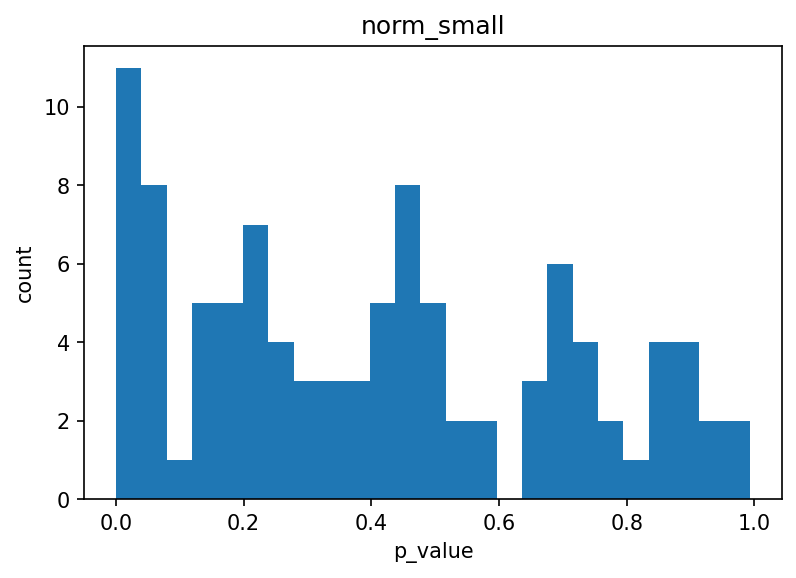

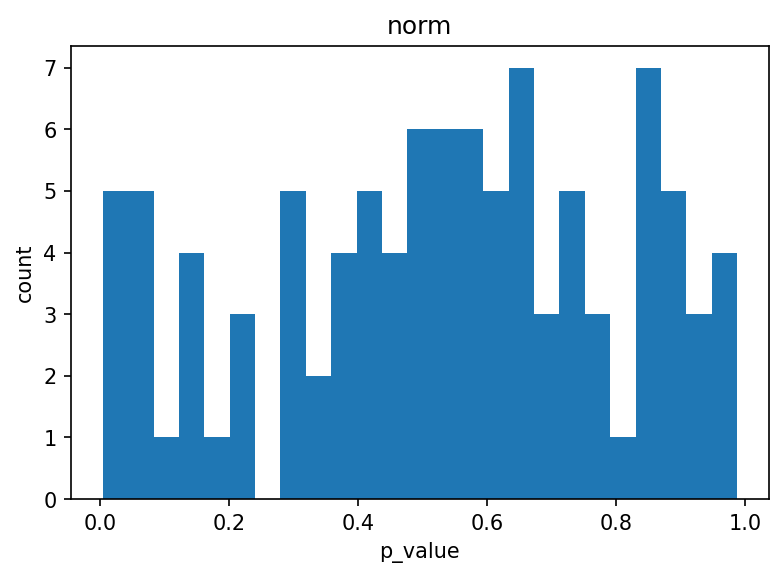

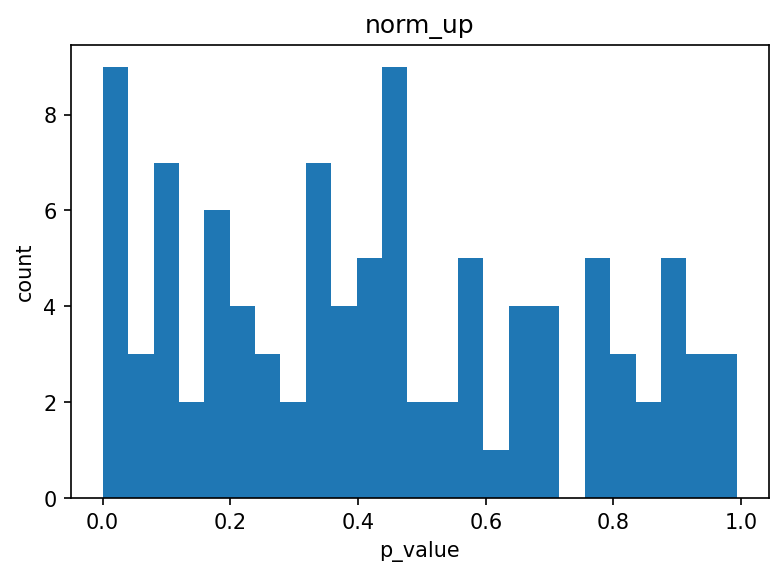

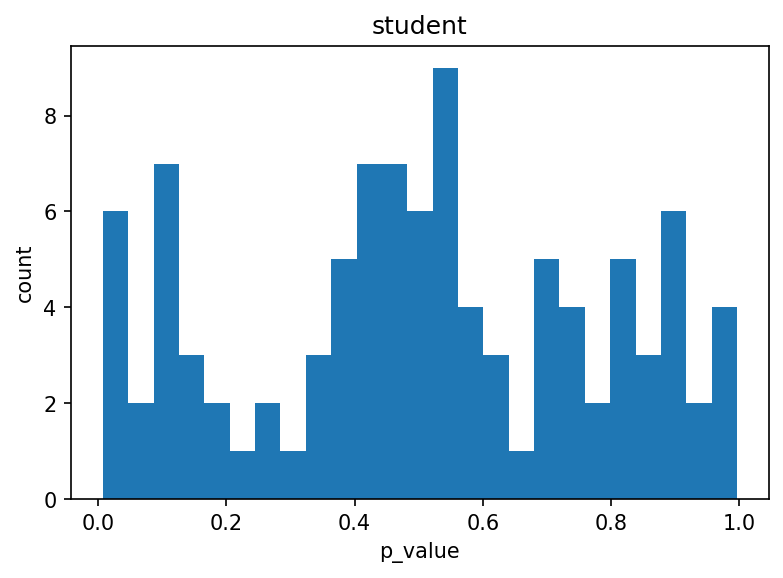

In [52]:
for distrib in ds: 
    plt.figure(dpi=150)
    plt.hist(p_values[distrib][100], bins=25);
    plt.ylabel('count')
    plt.xlabel('p_value')
    plt.title(distrib)

### 2) Критерий Колмогорова

In [53]:
def get_pvalues(F, nu, test, selections): 
    p_values = {'norm_small': {25:[], 50:[], 100:[]},
              'norm':{25:[], 50:[], 100:[]},
              'norm_up':{25:[], 50:[], 100:[]}, 
              'student':{25:[], 50:[], 100:[]}}

    for distribution in ds: 
        for size in sizes:
            for i in range(N): 
                sample_obs = selections[distribution][size][i]
                try: 
                    p_value = test(sample_obs, F, args = (nu, ), N=size).pvalue
                except: 
                    try: 
                        p_value = test(sample_obs, F, args = (nu, )).pvalue
                    except: 
                        stat = test(sample_obs, F).statistic
                        # тут нужны p-value anderson
                        closest_stat = min(keys, key=lambda x : abs(x - stat))
                        p_value = 1 - level_and_quan[closest_stat]
                    
                p_values[distribution][size].append(p_value)
                
    return p_values

In [54]:
nu = 5
p_values = get_pvalues(F, nu, kstest, selections)

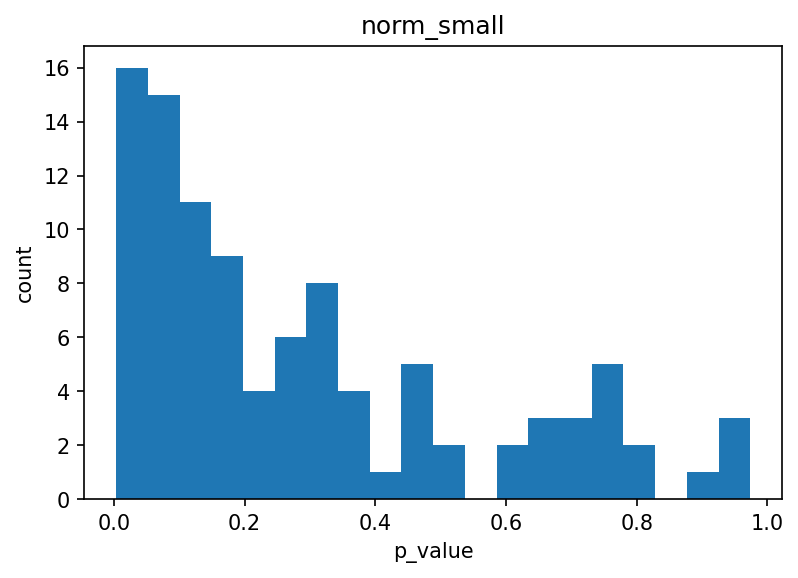

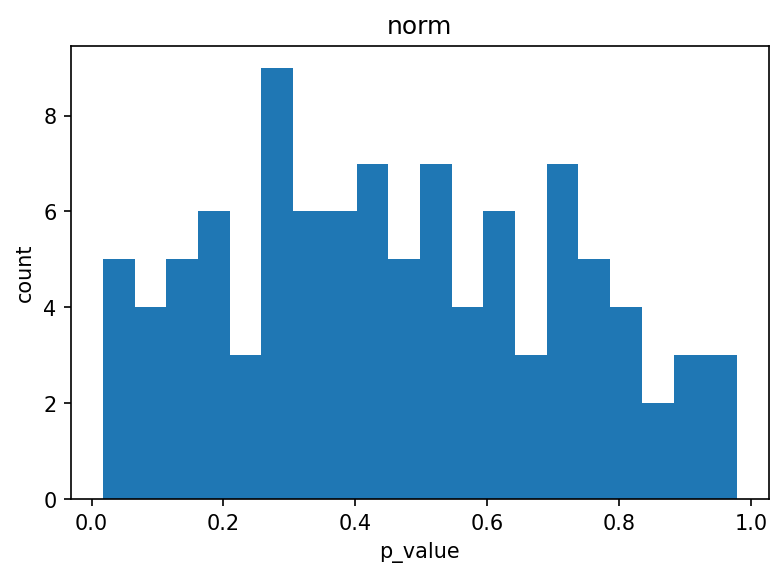

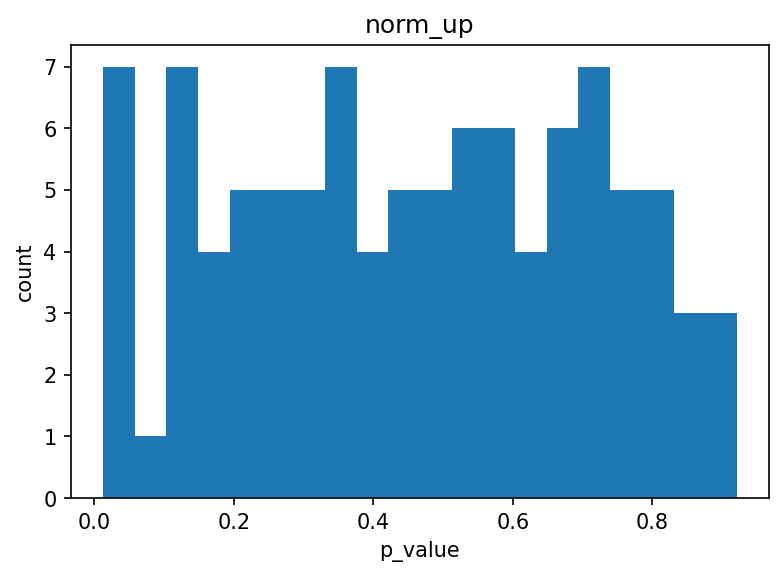

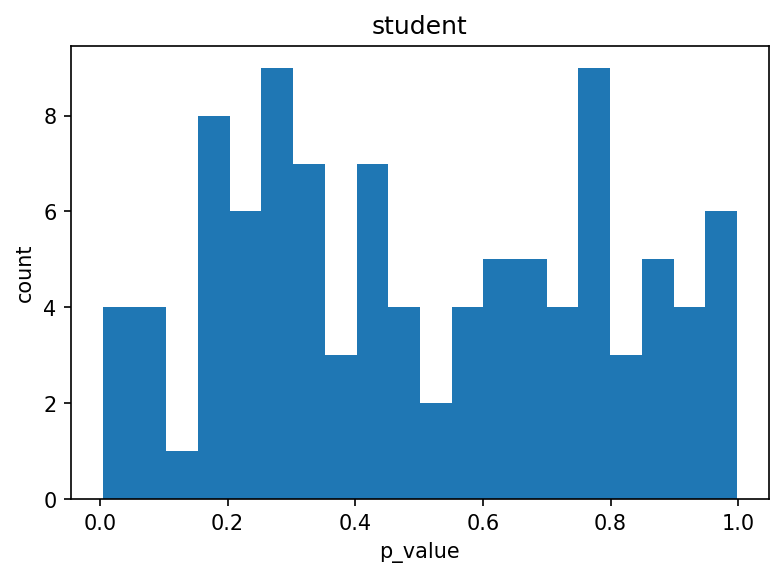

In [55]:
for distrib in ds: 
    plt.figure(dpi=150)
    plt.hist(p_values[distrib][100], bins=20);
    plt.ylabel('count')
    plt.xlabel('p_value')
    plt.title(distrib)

### 3) Критерий Крамера-Мизеса

In [56]:
nu = 5
p_values = get_pvalues(F, nu, cramervonmises, selections) 

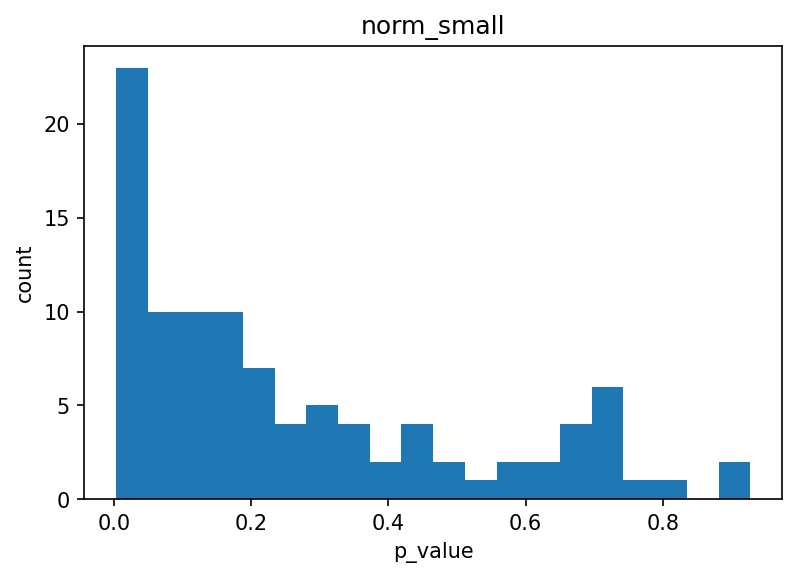

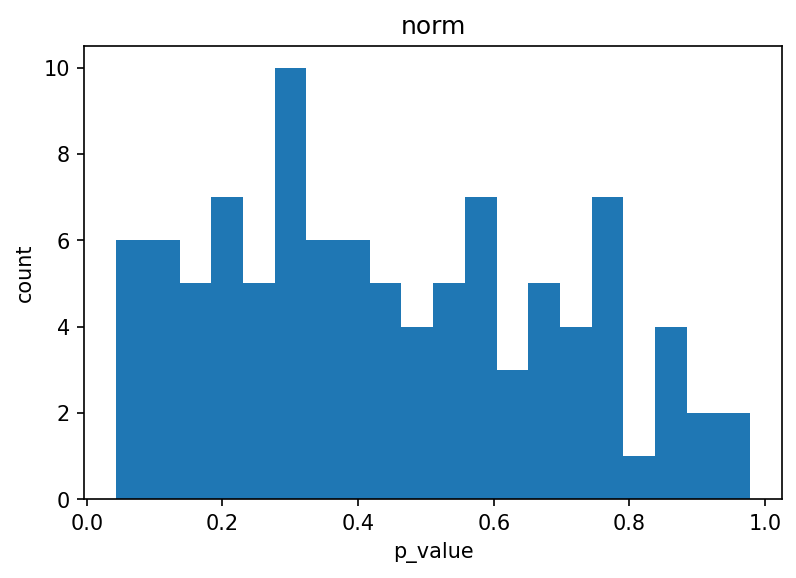

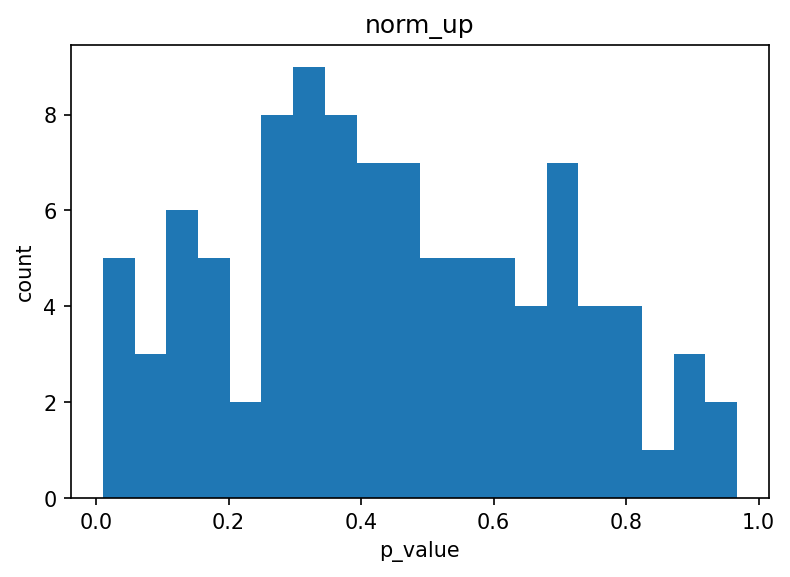

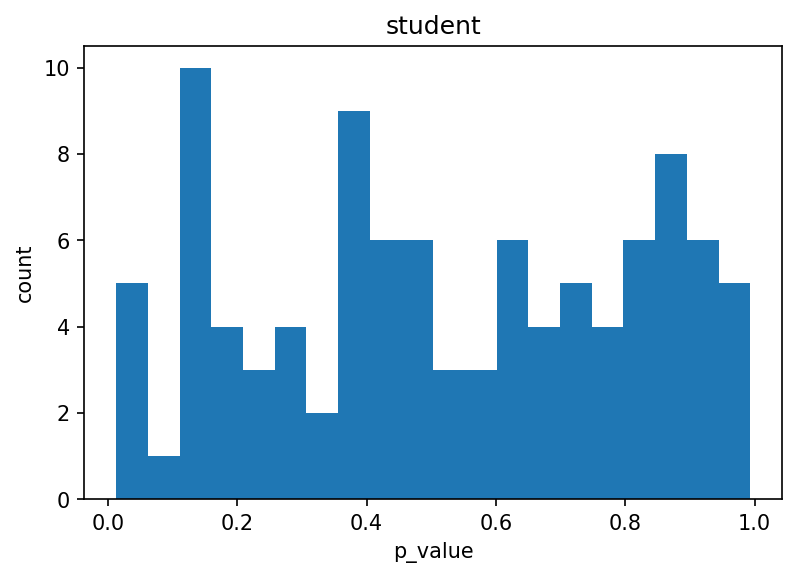

In [57]:
for distrib in ds: 
    plt.figure(dpi=150)
    plt.hist(p_values[distrib][100], bins=20);
    plt.ylabel('count')
    plt.xlabel('p_value')
    plt.title(distrib)

### 4) Критерий Андерсона-Дарлинга

In [58]:
p_values = get_pvalues('norm', 5, anderson, selections) 

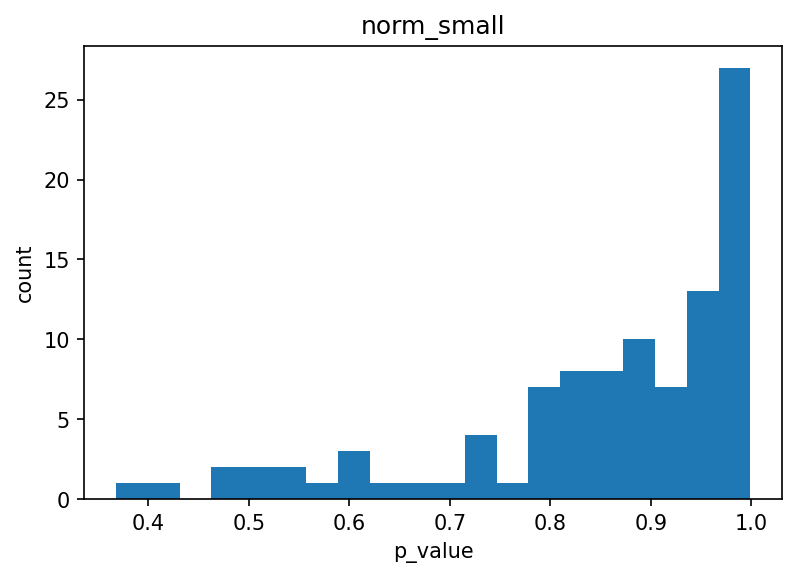

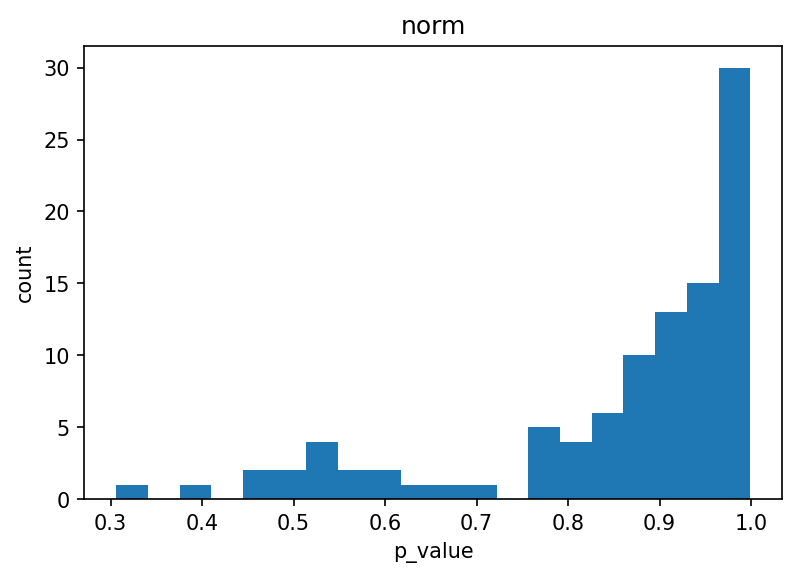

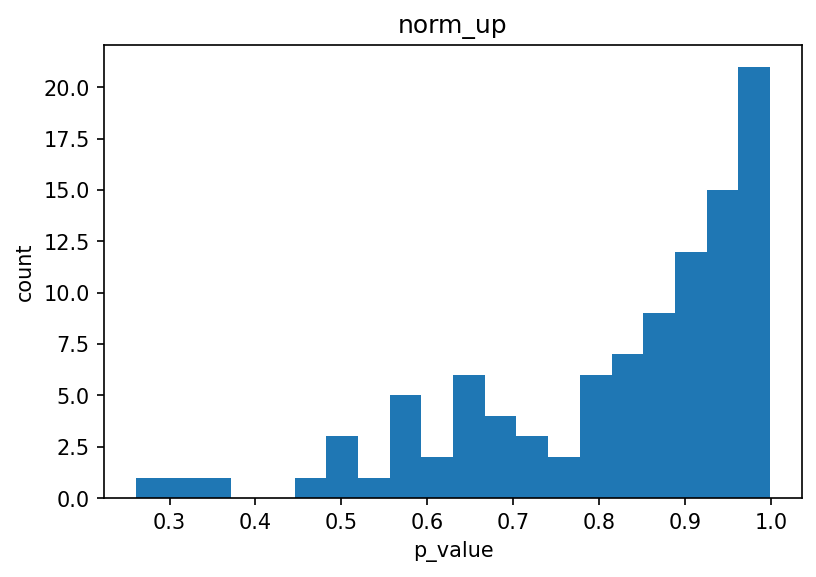

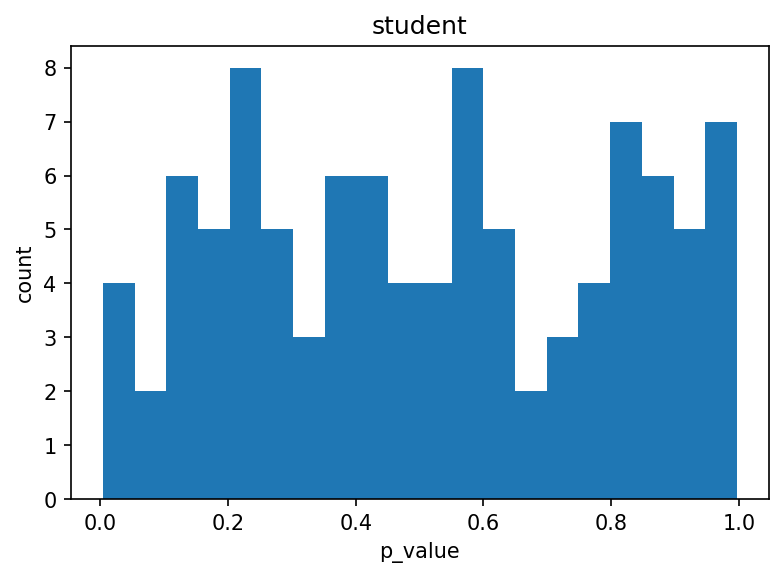

In [59]:
for distrib in ds: 
    plt.figure(dpi=150)
    plt.hist(p_values[distrib][100], bins=20);
    plt.ylabel('count')
    plt.xlabel('p_value')
    plt.title(distrib)

#### 1. Закон Бенфорда в его житейской интерпретации утверждает, что если выбрать набор каких-то чисел из реальных данных, то распределение первых цифр этих чисел будет иметь вид 𝑙𝑜𝑔10(1+1/𝑘), 𝑘 = 1, ..., 9. Проверить его а) на списке стран по населению, б) на числах Фиббоначчи в) интересном вам наборе данных.


Фиббоначчи: 0.301, Бенфорд: 0.3010299956639812
Фиббоначчи: 0.177, Бенфорд: 0.17609125905568124
Фиббоначчи: 0.125, Бенфорд: 0.12493873660829993
Фиббоначчи: 0.096, Бенфорд: 0.09691001300805642
Фиббоначчи: 0.08, Бенфорд: 0.07918124604762482
Фиббоначчи: 0.067, Бенфорд: 0.06694678963061322
Фиббоначчи: 0.056, Бенфорд: 0.05799194697768673
Фиббоначчи: 0.053, Бенфорд: 0.05115252244738129
Фиббоначчи: 0.045, Бенфорд: 0.04575749056067514
Power_divergenceResult(statistic=0.00016946241629138122, pvalue=1.0)


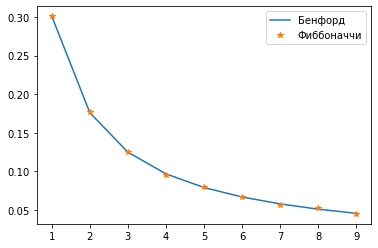

In [60]:
# б) на числах Фиббоначчи

from scipy.stats import chisquare

# Первые 1000 чисел Фиббоначчи
fib_nums = [1, 1]
for i in range(2, 1000):
    fib_nums.append(fib_nums[i-1] + fib_nums[i-2])

# Считаем частоту первых цифр
first_digits = [str(int(d))[0] for d in fib_nums]
expected_freq = [np.log10(1 + 1/int(d)) for d in range(1, 10)]
observed_freq = [first_digits.count(str(d))/len(first_digits) for d in range(1, 10)]

# Сравниваем
for i in range(9):
    print(f"Фиббоначчи: {observed_freq[i]}, Бенфорд: {expected_freq[i]}")
    
res = chisquare(observed_freq, expected_freq)
print(res)
    
#plt.hist(expected_freq, alpha=0.5, color='red')
#plt.hist(observed_freq, alpha=0.5)

plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9], expected_freq, label='Бенфорд')
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9], observed_freq, '*', label='Фиббоначчи')
plt.legend(loc='upper right')
plt.show()

Бенфорд: 0.3010299956639812, Население: 0.2981132075471698
Бенфорд: 0.17609125905568124, Население: 0.1471698113207547
Бенфорд: 0.12493873660829993, Население: 0.12830188679245283
Бенфорд: 0.09691001300805642, Население: 0.12075471698113208
Бенфорд: 0.07918124604762482, Население: 0.09811320754716982
Бенфорд: 0.06694678963061322, Население: 0.07924528301886792
Бенфорд: 0.05799194697768673, Население: 0.04150943396226415
Бенфорд: 0.05115252244738129, Население: 0.04150943396226415
Бенфорд: 0.04575749056067514, Население: 0.045283018867924525
Power_divergenceResult(statistic=0.024029214331891088, pvalue=0.9999999991400889)


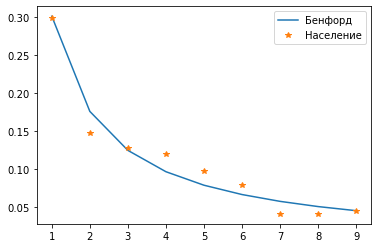

In [61]:
# a) на списке стран по населению

import numpy as np

# Список стран с их населением
country_and_populations = {}
with open('population.csv') as f:
    for line in f:
        country, population = line.strip().split(';')
        country_and_populations[country] = int(population)
        
population = country_and_populations.values()

first_digits = [str(int(d))[0] for d in population]
expected_freq = [np.log10(1 + 1/int(d)) for d in range(1, 10)]
observed_freq = [first_digits.count(str(d))/len(first_digits) for d in range(1, 10)]

for i in range(9):
    print(f"Бенфорд: {expected_freq[i]}, Население: {observed_freq[i]}")
    
res = chisquare(observed_freq, expected_freq)
print(res)

#plt.hist(expected_freq, alpha=0.5, color='red')
#plt.hist(observed_freq, alpha=0.5)

plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9], expected_freq, label='Бенфорд')
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9], observed_freq, '*', label='Население')
plt.legend(loc='upper right')
plt.show()

Бенфорд: 0.3010299956639812, Высота построек в футах: 0.2347417840375587
Бенфорд: 0.17609125905568124, Высота построек в футах: 0.1596244131455399
Бенфорд: 0.12493873660829993, Высота построек в футах: 0.1267605633802817
Бенфорд: 0.09691001300805642, Высота построек в футах: 0.10328638497652583
Бенфорд: 0.07918124604762482, Высота построек в футах: 0.11737089201877934
Бенфорд: 0.06694678963061322, Высота построек в футах: 0.08450704225352113
Бенфорд: 0.05799194697768673, Высота построек в футах: 0.046948356807511735
Бенфорд: 0.05115252244738129, Высота построек в футах: 0.06103286384976526
Бенфорд: 0.04575749056067514, Высота построек в футах: 0.06572769953051644
Power_divergenceResult(statistic=0.05233536980597562, pvalue=0.9999999808679129)


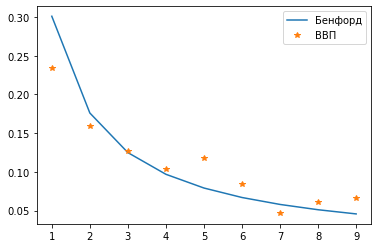

In [62]:
# в) на валовом доходе на душу населения по всему миру

money = []

with open("money.csv") as file:
    for line in file:
        temp = line.strip().split(';')
        money.append(float(temp[1]))
        
first_digits = [str(int(d))[0] for d in money]
observed_freq = [first_digits.count(str(d))/len(first_digits) for d in range(1, 10)]
expected_freq = [np.log10(1 + 1/int(d)) for d in range(1, 10)]
    
for i in range(9):
    print(f"Бенфорд: {expected_freq[i]}, Высота построек в футах: {observed_freq[i]}")
    
res = chisquare(observed_freq, expected_freq)
print(res)

# plt.hist(expected_freq, alpha=0.5, color='red')
# plt.hist(observed_freq, alpha=0.5)

plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9], expected_freq, label='Бенфорд')
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9], observed_freq, '*', label='ВВП')
plt.legend(loc='upper right')
plt.show()

##### 2. В файле Rainfall.txt приведены данные о рекордах выпадения дождя в австралийском местечке под названием Туррамура. Можно ли утверждать, что они подчиняются а) экспоненциальному б) логнормальному распределению? В обоих случаях использовать и визуальный метод проверки. Если да, то оцените параметры распределения с помощью ОМП.

6.19343418343302 > 0.91
Для уровня значимости 15.0 нулевая гипотеза может быть отклонена
6.19343418343302 > 1.064
Для уровня значимости 10.0 нулевая гипотеза может быть отклонена
6.19343418343302 > 1.324
Для уровня значимости 5.0 нулевая гипотеза может быть отклонена
6.19343418343302 > 1.586
Для уровня значимости 2.5 нулевая гипотеза может быть отклонена
6.19343418343302 > 1.932
Для уровня значимости 1.0 нулевая гипотеза может быть отклонена


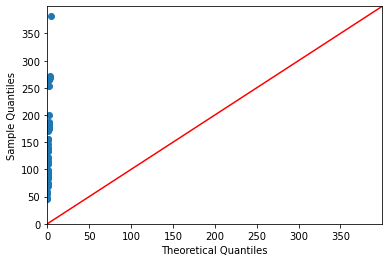

In [63]:
# a)

from scipy import stats
import seaborn as sns
from scipy.stats import anderson, expon
import statsmodels.api as sm
import pylab
from statsmodels.graphics.gofplots import qqplot

rainfall_data = []

with open('rainfall.txt') as file:
    first_line = file.readline()
    for line in file:
        rainfall_data.append(float(line.strip()))
    
rainfall_data = np.array(rainfall_data)
# Проверка на принадлежность с помощью критерий Андерсона

stat_exp, crit_value_exp, sign_levs_exp = anderson(rainfall_data, "expon")
for i in range(len(crit_value_exp)):
    if stat_exp > crit_value_exp[i]:
        print(f"{stat_exp} > {crit_value_exp[i]}")
        print(f"Для уровня значимости {sign_levs_exp[i]} нулевая гипотеза может быть отклонена")
    else:
        print(f"{stat_exp} < {crit_value_exp[i]}")
        print(f"Для уровня значимости {sign_levs_exp[i]} нулевая гипотеза НЕ может быть отклонена")

# Визуальный метод
fig = sm.qqplot(rainfall_data, dist=expon, line='45')
plt.show()

Если возвращаемая статистика больше этих критических значений, то для соответствующего уровня значимости нулевая гипотеза о том, что данные получены из выбранного распределения, может быть отклонена. Возвращенная статистика упоминается как «A2» в ссылках.

Подчиняется логнормальному распределению


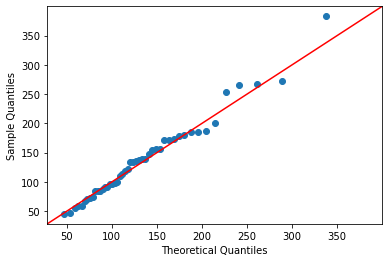

In [64]:
# б)

from scipy.stats import lognorm
import pylab

shape, loc, scale = stats.lognorm.fit(rainfall_data)
param = [shape, loc, scale]
p_value = stats.kstest(rainfall_data, "lognorm", param)[1]

if p_value < 0.05:
    print("Не подчиняется логнормальному распределению")
else:
    print("Подчиняется логнормальному распределению")
    
probplot = sm.ProbPlot(rainfall_data, dist=lognorm, loc=loc, scale=scale, distargs=(shape,))
probplot.qqplot(line='45')
plt.show()

In [65]:
# ОМП

import scipy.optimize as opt
import scipy.stats as st
import numpy as np

def lognormal_logL(log_par, data):
    N = len(data)
    mu, sigma = np.exp(log_par)
    logL = N*np.log(1/(sigma*np.sqrt(2*np.pi)))+(N/(2*np.power(sigma, 2))) + np.sum(np.log(1/data)) - np.sum(np.power(np.log(data) - mu,2))  
    return logL

In [66]:
def lognormal_mle(data):
    res = opt.minimize(
    fun=lambda log_params, data: -lognormal_logL(log_params, data),
    x0=np.array([0.5, 0.5]), args=(data,), method='BFGS')
    a,b = np.exp(res.x)
    return a,b

In [67]:
# Проверка на выборке логнормального распределения с задананными параметрами

mu = 50
sigma = 5
sample = np.random.lognormal(mu, sigma, 1000)

mu_est, sigma_est = lognormal_mle(sample)
print(mu_est)
print(np.exp(sigma_est))

50.185333425730434
4.958739703988621


/var/folders/sv/b5zr3x594nqfqz1f1_pgq6f00000gn/T/ipykernel_31863/1934026259.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  logL = N*np.log(1/(sigma*np.sqrt(2*np.pi)))+(N/(2*np.power(sigma, 2))) + np.sum(np.log(1/data)) - np.sum(np.power(np.log(data) - mu,2))
/Users/ivanbockov/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/var/folders/sv/b5zr3x594nqfqz1f1_pgq6f00000gn/T/ipykernel_31863/1934026259.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  logL = N*np.log(1/(sigma*np.sqrt(2*np.pi)))+(N/(2*np.power(sigma, 2))) + np.sum(np.log(1/data)) - np.sum(np.power(np.log(data) - mu,2))
/Users/ivanbockov/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


In [68]:
# Оцененные параметры выборки
mu_rain, sigma_rain = lognormal_mle(rainfall_data)
print(mu_rain, sigma_rain, sep='\n')

4.487848331817341
1.4452400218213224


/var/folders/sv/b5zr3x594nqfqz1f1_pgq6f00000gn/T/ipykernel_31863/1934026259.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  logL = N*np.log(1/(sigma*np.sqrt(2*np.pi)))+(N/(2*np.power(sigma, 2))) + np.sum(np.log(1/data)) - np.sum(np.power(np.log(data) - mu,2))
/Users/ivanbockov/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/var/folders/sv/b5zr3x594nqfqz1f1_pgq6f00000gn/T/ipykernel_31863/1934026259.py:10: RuntimeWarning: overflow encountered in power
  logL = N*np.log(1/(sigma*np.sqrt(2*np.pi)))+(N/(2*np.power(sigma, 2))) + np.sum(np.log(1/data)) - np.sum(np.power(np.log(data) - mu,2))
/var/folders/sv/b5zr3x594nqfqz1f1_pgq6f00000gn/T/ipykernel_31863/1934026259.py:10: RuntimeWarning: invalid value encountered in double_scalars
  logL = N*np.log(1/(sigma*np.sqrt(2*np.pi)))+(N/(2*np.power(sigma, 2))) + np.sum(np.log(1/data)) - np.sum(np.power(np.log(data) - mu,2))
/var/

In [69]:
def my_fit(data):
        data = np.asarray(data)
        lndata = np.log(data) 
        scale = np.exp(lndata.mean())     
        shape = lndata.std()
        return shape, scale

In [70]:
# Встроенная функция lognorm.fit()

print(param)

[0.5328131660091254, 9.561823634539728, 110.9096082631217]


In [71]:
# shape and scale от моей функции

print(my_fit(rainfall_data))

(0.4857380756164556, 121.78678536501177)
